In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [2]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

In [3]:
num = df.select_dtypes("int64")
cat = df.select_dtypes("object")

In [4]:
num_1 = num.drop(columns="total_claim_amount")

In [5]:
X = np.array(num_1)
X

array([[ 4809, 48029,    61, ...,    52,     0,     9],
       [ 2228, 92260,    64, ...,    26,     0,     1],
       [14947, 22139,   100, ...,    31,     0,     2],
       ...,
       [23893, 39837,   201, ...,    63,     0,     2],
       [11971, 64195,   158, ...,    27,     4,     6],
       [ 6857, 68942,   101, ...,     1,     0,     3]])

In [6]:
y = np.array(num["total_claim_amount"]).reshape(-1,1)
y

array([[ 292],
       [ 744],
       [ 480],
       ...,
       [ 381],
       [ 618],
       [1021]])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

In [9]:
from sklearn.preprocessing import PowerTransformer

In [10]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(X_train)
X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

In [11]:
pt.fit(y_train)
y_train_transformed = pt.transform(y_train)
y_test_transformed = pt.transform(y_test)

In [12]:
lm = LinearRegression()
model = lm.fit(X_train_transformed,y_train_transformed)

In [13]:
print("Slope =", model.coef_)


Slope = [[-0.02202088 -0.1551118   0.49904032  0.00272208 -0.0078539  -0.00475689
   0.01526189]]


In [14]:
print("Intercept =", model.intercept_)

Intercept = [-3.44552491e-12]


In [15]:
y_pred = model.predict(X_test_transformed)

In [16]:
compare = pd.DataFrame({'y_test':list(y_test_transformed) ,'y_pred': list(y_pred)})
compare

,y_test,y_pred
0,[-1.2387499175552843],[-0.8897780768656476]
1,[0.8701935867657831],[0.5279358584125987]
2,[-0.5585159186419132],[-0.1883254282554631]
3,[-1.4876690952808187],[-0.6762554750333593]
4,[1.7630428206144622],[0.9780433755308113]
...,...,...
3202,[0.0896398726285492],[0.5385120478786327]
3203,[-0.22863433163092406],[-0.5026511153430021]
3204,[-1.8723978026313317],[-0.12954565211956834]
3205,[0.694183210335347],[0.5966356851793554]


In [17]:
import matplotlib.pyplot as plt

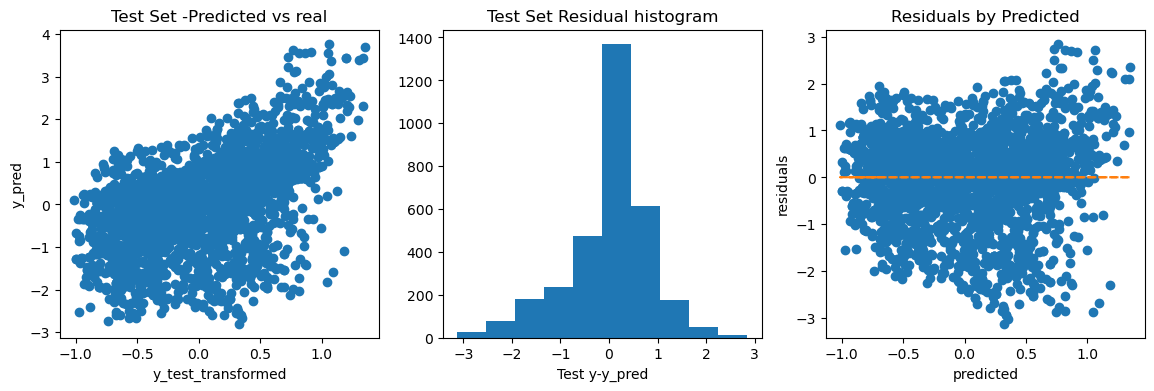

In [18]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test_transformed, 'o')
ax[0].set_xlabel("y_test_transformed")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test_transformed - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test_transformed - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [19]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
mse = mse(y_test_transformed,y_pred)
print("MSE =",mse)

MSE = 0.7175919838371062


In [20]:
mae = mae(y_test_transformed,y_pred)
print("MAE =",mae)

MAE = 0.6156344341057539


In [21]:
import math

In [22]:
RMSE = math.sqrt(mse)
print("RMSE =",RMSE)

RMSE = 0.847108011907045


In [23]:
r2 = r2(y_test_transformed,y_pred)
print("R2 =",r2)

R2 = 0.25480701928052873


In [24]:
num_1

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


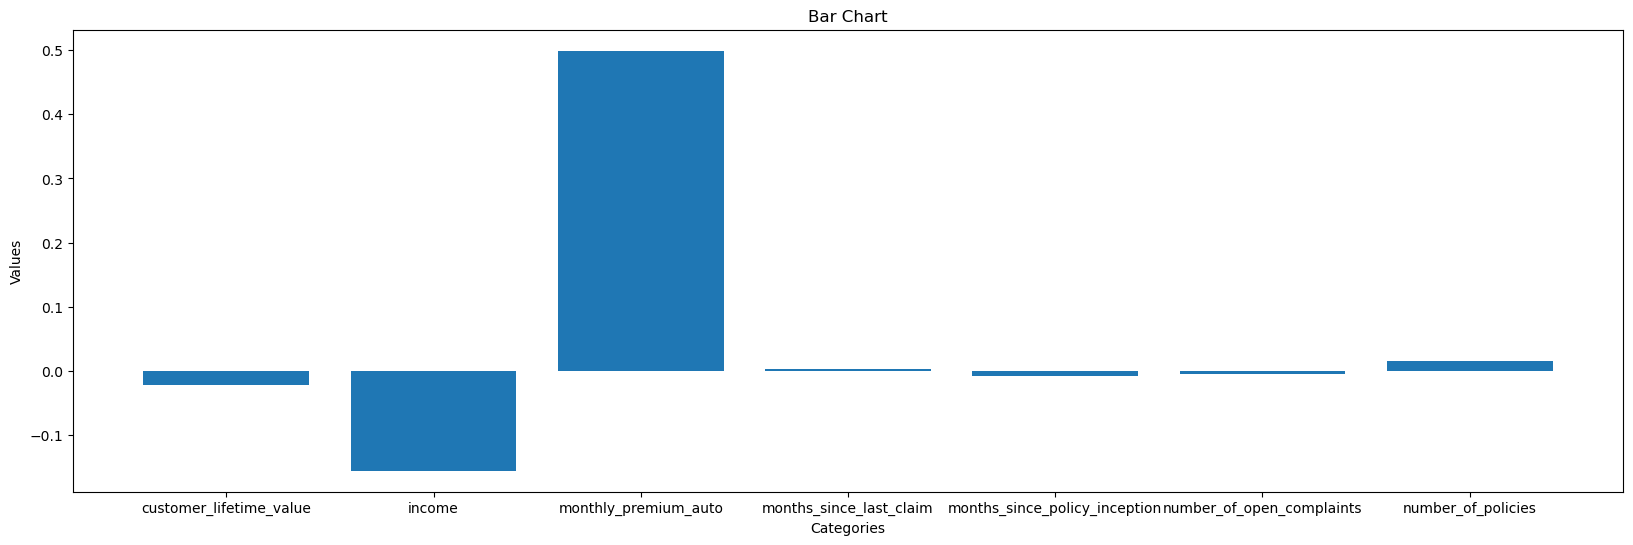

In [35]:
import matplotlib.pyplot as plt

# Data for the bar chart
column_names1 = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
                  'months_since_last_claim', 'months_since_policy_inception',
                  'number_of_open_complaints', 'number_of_policies']
coef_values1 = [-0.02202088, -0.1551118, 0.49904032, 0.00272208, -0.0078539, -0.00475689, 0.01526189]


fig, ax = plt.subplots(figsize=(20, 6))


# Plot the bar chart
ax.bar(column_names1, coef_values1)

# Set labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Bar Chart')

# Display the plot
plt.show()




In [33]:
print(len(column_names1))
print(len(coef_values1))


7
7


In [26]:


# Calculate the range for each column
column_ranges = num_1.max() - num_1.min()

# Print the ranges
print("Column Ranges:")
print(column_ranges)


Column Ranges:
customer_lifetime_value          81427
income                           89944
monthly_premium_auto               237
months_since_last_claim             35
months_since_policy_inception       99
number_of_open_complaints            5
number_of_policies                   8
dtype: int64


In [37]:
cat = df.select_dtypes("object")
cat

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [39]:
columns_to_encode = ['region', 'policy' ,'response', 'month', 'employment_status', 'location_code', 'marital_status', 'gender', 'policy_type', 'renew_offer_type', 'sales_channel', 'vehicle_class']

In [47]:
df_encoded = pd.get_dummies(df, columns=columns_to_encode)
df_encoded

,customer_lifetime_value,coverage,education,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,...,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,4809,0,1,2011-02-18,48029,61,7,52,0,9,...,1,0,0,0,1,0,0,0,0,0
1,2228,0,1,2011-01-18,92260,64,3,26,0,1,...,0,0,1,0,1,0,0,0,0,0
2,14947,0,0,2011-02-10,22139,100,34,31,0,2,...,0,0,1,0,0,0,0,0,1,0
3,22332,1,1,2011-01-11,49078,97,10,3,0,2,...,0,1,0,0,1,0,0,0,0,0
4,9025,2,0,2011-01-17,23675,117,33,31,0,7,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,2,0,2011-01-19,61541,253,12,40,0,7,...,0,0,0,1,0,1,0,0,0,0
10685,5259,0,1,2011-01-06,61146,65,7,68,0,6,...,0,1,0,0,1,0,0,0,0,0
10686,23893,1,0,2011-02-06,39837,201,11,63,0,2,...,0,0,0,1,0,0,1,0,0,0
10687,11971,2,1,2011-02-13,64195,158,0,27,4,6,...,0,1,0,0,0,0,0,0,1,0


In [41]:
from sklearn.preprocessing import LabelEncoder

ordinal_columns = ['coverage', 'education', 'vehicle_size']

# Define the hierarchical order for each ordinal column
ordinal_order = {
    'coverage': ["basic", "extended", "premium"],
    'education': ["high school or below", "college", "bachelor", "master", "doctor"],
    'vehicle_size': ["small", "medsize", "large"]
}

In [42]:
# Label encoding for 'education' column
le_education = LabelEncoder()
unique_education_values = df['education'].unique()
le_education.fit(unique_education_values)
df['education'] = le_education.transform(df['education'])

# Label encoding for 'coverage' column
le_coverage = LabelEncoder()
unique_coverage_values = df['coverage'].unique()
le_coverage.fit(unique_coverage_values)
df['coverage'] = le_coverage.transform(df['coverage'])

# Label encoding for 'vehicle_size' column
le_vehicle_size = LabelEncoder()
unique_vehicle_size_values = df['vehicle_size'].unique()
le_vehicle_size.fit(unique_vehicle_size_values)
df['vehicle_size'] = le_vehicle_size.transform(df['vehicle_size'])

In [52]:
df_encoded 
df_encoded = df_encoded.drop('effective_to_date', axis = 1)

,customer_lifetime_value,coverage,education,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,...,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,4809,0,1,48029,61,7,52,0,9,292,...,1,0,0,0,1,0,0,0,0,0
1,2228,0,1,92260,64,3,26,0,1,744,...,0,0,1,0,1,0,0,0,0,0
2,14947,0,0,22139,100,34,31,0,2,480,...,0,0,1,0,0,0,0,0,1,0
3,22332,1,1,49078,97,10,3,0,2,484,...,0,1,0,0,1,0,0,0,0,0
4,9025,2,0,23675,117,33,31,0,7,707,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,2,0,61541,253,12,40,0,7,1214,...,0,0,0,1,0,1,0,0,0,0
10685,5259,0,1,61146,65,7,68,0,6,273,...,0,1,0,0,1,0,0,0,0,0
10686,23893,1,0,39837,201,11,63,0,2,381,...,0,0,0,1,0,0,1,0,0,0
10687,11971,2,1,64195,158,0,27,4,6,618,...,0,1,0,0,0,0,0,0,1,0


In [54]:
# Check for NA values in df_encoded
na_values = df_encoded.isna().sum()

# Display the count of NA values for each column
print(na_values)


customer_lifetime_value            0
coverage                           0
education                          0
income                             0
monthly_premium_auto               0
months_since_last_claim            0
months_since_policy_inception      0
number_of_open_complaints          0
number_of_policies                 0
total_claim_amount                 0
vehicle_size                       0
region_central                     0
region_east                        0
region_north west                  0
region_west region                 0
policy_corporate l1                0
policy_corporate l2                0
policy_corporate l3                0
policy_personal l1                 0
policy_personal l2                 0
policy_personal l3                 0
policy_special l1                  0
policy_special l2                  0
policy_special l3                  0
response_no                        0
response_yes                       0
month_feb                          0
m

In [60]:
# Concatenate horizontally
merged_df = pd.concat([df_encoded, num_1], axis=1)
merged_df = merged_df.drop('total_claim_amount', axis =1)
##### do power transform for numericals and then merge with cat (discrete variables)

In [61]:
X = np.array(merged_df)

In [65]:
y = np.array(num["total_claim_amount"]).reshape(-1,1)

In [63]:
X

array([[ 4809,     0,     1, ...,    52,     0,     9],
       [ 2228,     0,     1, ...,    26,     0,     1],
       [14947,     0,     0, ...,    31,     0,     2],
       ...,
       [23893,     1,     0, ...,    63,     0,     2],
       [11971,     2,     1, ...,    27,     4,     6],
       [ 6857,     0,     0, ...,     1,     0,     3]])

In [66]:
y

array([[ 292],
       [ 744],
       [ 480],
       ...,
       [ 381],
       [ 618],
       [1021]])

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 100)

In [69]:
from sklearn.preprocessing import PowerTransformer

In [70]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(X_train)
X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

In [71]:
lm = LinearRegression()
model = lm.fit(X_train_transformed,y_train_transformed)

In [72]:
print("Slope =", model.coef_)
print("Intercept =", model.intercept_)

Slope = [[ 6.99512538e+10 -2.21786499e-02 -1.04522705e-03  6.98173133e+10
   8.87589141e+12 -2.86135187e+12 -7.43067827e+11  2.06051896e+12
   2.00266049e+12 -2.58052349e-03 -5.35559578e+12 -3.34532175e+12
  -5.32322135e+12 -5.61221506e+12 -6.62582244e+11 -8.50416923e+11
  -1.06879192e+12  1.08998888e+12  1.33745899e+12  1.52446285e+12
   7.26123758e+11  1.02705994e+12  1.03551407e+12  8.59908670e+12
   8.59908670e+12  6.06282203e+11  6.06282203e+11  7.16698739e+09
   1.65859599e+10  7.07706919e+09  5.84438702e+09  1.49412526e+10
  -7.46417940e+10 -9.09270408e+10 -7.14183717e+10 -1.42294066e+11
  -1.96867760e+11 -1.77907236e+11 -1.14378962e+11 -1.14378962e+11
  -1.75857727e+12 -4.73108593e+12 -3.11690178e+12  1.78368249e+12
   1.67834949e+12  1.32785610e+12  1.13976147e+12  2.83979014e+12
   2.63982819e+12  2.31773847e+12  2.09899432e+12  1.12668102e+12
   3.05379825e+11  3.11727577e+11  4.94207858e+11  9.03397765e+11
   9.04742313e+11 -6.99512538e+10 -6.98173133e+10 -8.87589141e+12
  

In [73]:
y_pred = model.predict(X_test_transformed)

In [74]:
compare = pd.DataFrame({'y_test':list(y_test_transformed) ,'y_pred': list(y_pred)})

In [75]:
compare

,y_test,y_pred
0,[-1.2387499175552843],[-0.0947253469801409]
1,[0.8701935867657831],[-0.0185534719801409]
2,[-0.5585159186419132],[-0.0849597219801409]
3,[-1.4876690952808187],[0.0302746530198591]
4,[1.7630428206144622],[0.0185559030198591]
...,...,...
3202,[0.0896398726285492],[-0.0869128469801409]
3203,[-0.22863433163092406],[-0.0283190969801409]
3204,[-1.8723978026313317],[-0.1064440969801409]
3205,[0.694183210335347],[0.008790278019859099]


In [76]:
import matplotlib.pyplot as plt

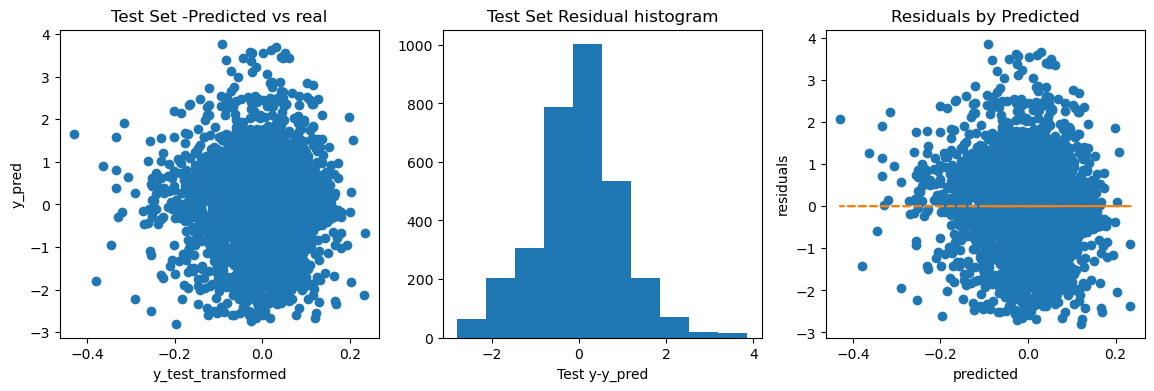

In [77]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test_transformed, 'o')
ax[0].set_xlabel("y_test_transformed")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test_transformed - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test_transformed - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [78]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
mse = mse(y_test_transformed,y_pred)
print("MSE =",mse)

MSE = 0.9721289656355032


In [79]:
mae = mae(y_test_transformed,y_pred)
print("MAE =",mae)

MAE = 0.7425333721552271


In [80]:
import math

In [81]:
RMSE = math.sqrt(mse)
print("RMSE =",RMSE)

RMSE = 0.9859660063285667


In [82]:
r2 = r2(y_test_transformed,y_pred)
print("R2 =",r2) #### power transformed categoricals. 

R2 = -0.009520309399249971


In [83]:


n = len(y_test_transformed)  # Number of samples
p = 58  # Number of predictors

# Calculate the adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Display the adjusted R-squared
print("Adjusted R2 =", adjusted_r2)


Adjusted R2 = -0.028120111796059444


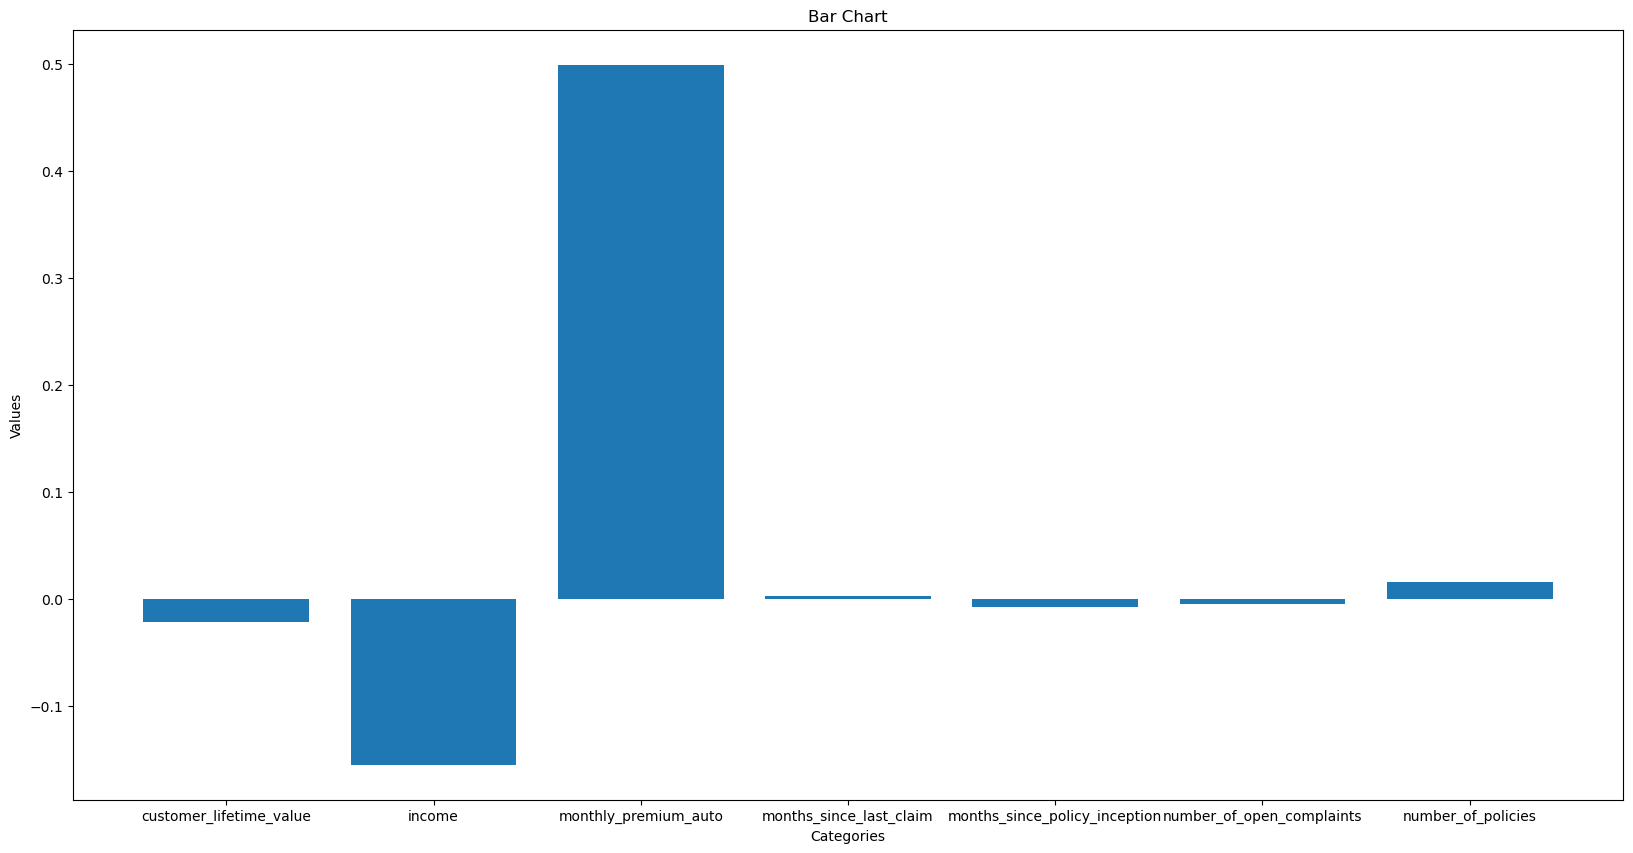

In [87]:
import matplotlib.pyplot as plt

# Data for the bar chart
column_names2 = [
    'customer_lifetime_value',
    'coverage',
    'education',
    'income',
    'monthly_premium_auto',
    'months_since_last_claim',
    'months_since_policy_inception',
    'number_of_open_complaints',
    'number_of_policies',
    'total_claim_amount',
    'vehicle_size',
    'region_central',
    'region_east',
    'region_north west',
    'region_west region',
    'policy_corporate l1',
    'policy_corporate l2',
    'policy_corporate l3',
    'policy_personal l1',
    'policy_personal l2',
    'policy_personal l3',
    'policy_special l1',
    'policy_special l2',
    'policy_special l3',
    'response_no',
    'response_yes',
    'month_feb',
    'month_jan',
    'employment_status_disabled',
    'employment_status_employed',
    'employment_status_medical leave',
    'employment_status_retired',
    'employment_status_unemployed',
    'location_code_rural',
    'location_code_suburban',
    'location_code_urban',
    'marital_status_divorced',
    'marital_status_married',
    'marital_status_single',
    'gender_f',
    'gender_m',
    'policy_type_corporate auto',
    'policy_type_personal auto',
    'policy_type_special auto',
    'renew_offer_type_offer1',
    'renew_offer_type_offer2',
    'renew_offer_type_offer3',
    'renew_offer_type_offer4',
    'sales_channel_agent',
    'sales_channel_branch',
    'sales_channel_call center',
    'sales_channel_web',
    'vehicle_class_four-door car',
    'vehicle_class_luxury car',
    'vehicle_class_luxury suv',
    'vehicle_class_sports car',
    'vehicle_class_suv',
    'vehicle_class_two-door car'
]

coef_values2 = [
    [6.99512538e+10, -2.21786499e-02, -1.04522705e-03, 6.98173133e+10, 8.87589141e+12, -2.86135187e+12, -7.43067827e+11, 2.06051896e+12, 2.00266049e+12, -2.58052349e-03, -5.35559578e+12, -3.34532175e+12, -5.32322135e+12, -5.61221506e+12, -6.62582244e+11, -8.50416923e+11, -1.06879192e+12, 1.08998888e+12, 1.33745899e+12, 1.52446285e+12, 7.26123758e+11, 1.02705994e+12, 1.03551407e+12, 8.59908670e+12, 8.59908670e+12, 6.06282203e+11, 6.06282203e+11, 7.16698739e+09, 1.65859599e+10, 7.07706919e+09, 5.84438702e+09, 1.49412526e+10, -7.46417940e+10, -9.09270408e+10, -7.14183717e+10, -1.42294066e+11, -1.96867760e+11, -1.77907236e+11, -1.14378962e+11, -1.14378962e+11, -1.75857727e+12, -4.73108593e+12, -3.11690178e+12, 1.78368249e+12, 1.67834949e+12, 1.32785610e+12, 1.13976147e+12, 2.83979014e+12, 2.63982819e+12, 2.31773847e+12, 2.09899432e+12, 1.12668102e+12, 3.05379825e+11, 3.11727577e+11, 4.94207858e+11, 9.03397765e+11, 9.04742313e+11, -6.99512538e+10, -6.98173133e+10, -8.87589141e+12, 2.86135187e+12, 7.43067827e+11, -2.06051896e+12, -2.00266049e+12]
]



fig, ax = plt.subplots(figsize=(20, 10))


# Plot the bar chart
ax.bar(column_names1, coef_values1)

# Set labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Bar Chart')

# Display the plot
plt.show()



In [88]:
# Assuming `df_encoded` is your DataFrame containing the data
# and `column_names2` is the list of column names

ranges = []
for col_name in column_names2:
    col_values = df_encoded[col_name]
    col_range = np.ptp(col_values)
    ranges.append(col_range)

# Display the column names and their respective ranges
for col_name, col_range in zip(column_names2, ranges):
    print(f"Column: {col_name}, Range: {col_range}")


Column: customer_lifetime_value, Range: 81427
Column: coverage, Range: 2
Column: education, Range: 4
Column: income, Range: 89944
Column: monthly_premium_auto, Range: 237
Column: months_since_last_claim, Range: 35
Column: months_since_policy_inception, Range: 99
Column: number_of_open_complaints, Range: 5
Column: number_of_policies, Range: 8
Column: total_claim_amount, Range: 2893
Column: vehicle_size, Range: 2
Column: region_central, Range: 1
Column: region_east, Range: 1
Column: region_north west, Range: 1
Column: region_west region, Range: 1
Column: policy_corporate l1, Range: 1
Column: policy_corporate l2, Range: 1
Column: policy_corporate l3, Range: 1
Column: policy_personal l1, Range: 1
Column: policy_personal l2, Range: 1
Column: policy_personal l3, Range: 1
Column: policy_special l1, Range: 1
Column: policy_special l2, Range: 1
Column: policy_special l3, Range: 1
Column: response_no, Range: 1
Column: response_yes, Range: 1
Column: month_feb, Range: 1
Column: month_jan, Range: 1

### Find and remove outliers for customer_lifetime_value, Range: 81427

In [136]:
print(df_encoded['customer_lifetime_value'].max())
print(df_encoded['customer_lifetime_value'].min())

28622.0
1898.0


In [97]:
median_value = df_encoded['customer_lifetime_value'].median()
print("Median of 'customer_lifetime_value':", median_value)


Median of 'customer_lifetime_value': 5776.0


### Using the IQR method to find outliers

In [100]:
quartiles = df_encoded['customer_lifetime_value'].quantile([0.25, 0.5, 0.75])
print("Quartiles of 'customer_lifetime_value':")
print("Q1 (25th percentile):", quartiles[0.25])
print("Q2 (50th percentile / median):", quartiles[0.5])
print("Q3 (75th percentile):", quartiles[0.75])
print("IQR",quartiles[0.75]-quartiles[0.25])
print("IQR x 1.5",(quartiles[0.75]-quartiles[0.25])*1.5 )

Quartiles of 'customer_lifetime_value':
Q1 (25th percentile): 4014.0
Q2 (50th percentile / median): 5776.0
Q3 (75th percentile): 8991.0
IQR 4977.0
IQR x 1.5 7465.5


In [110]:
Q3 = 8991.0
IQR = 4977.0
threshold = IQR * 1.5
upper_limit = Q3 + threshold

df_encoded['clv_no_outlier'] = df_encoded['customer_lifetime_value'].where(df_encoded['customer_lifetime_value'] <= upper_limit)
df_encoded['clv_no_outlier'].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 10689 entries, 0 to 10688
Series name: clv_no_outlier
Non-Null Count  Dtype  
--------------  -----  
9728 non-null   float64
dtypes: float64(1)
memory usage: 83.6 KB


In [102]:
std_clv = np.std(df_encoded['customer_lifetime_value'])
print(std_clv)

6877.236169759157


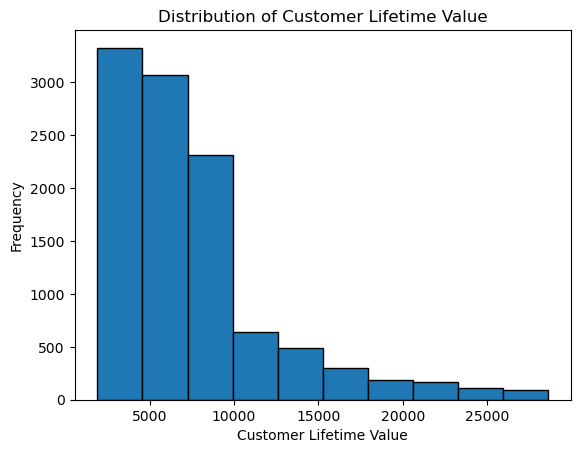

In [144]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(df_encoded['customer_lifetime_value'], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Lifetime Value')

# Display the plot
plt.show()


#### Using the z score method to find outliers

In [128]:
from scipy import stats

# Calculate z-scores for each data point
z_scores = stats.zscore(df_encoded['customer_lifetime_value'])

# Define the threshold for outlier detection
threshold = 3  # You can adjust this threshold value as needed

# Find outliers
outliers = df_encoded[abs(z_scores) > threshold]

# Print the outliers
print("Outliers in 'customer_lifetime_value':",outliers)

outliers["customer_lifetime_value"]


Outliers in 'customer_lifetime_value':        customer_lifetime_value  coverage  education  income  \
77                       74228         1          3   88140   
85                       32474         0          3   71449   
128                      35862         1          3   26376   
184                      34611         0          3   20090   
206                      46805         1          3   83006   
...                        ...       ...        ...     ...   
10394                    32613         2          2   45173   
10409                    40636         1          3   31267   
10519                    32643         2          4   77915   
10633                    44771         1          3   46924   
10671                    32306         0          3   36301   

       monthly_premium_auto  months_since_last_claim  \
77                      242                        1   
85                      102                       17   
128                     121         

77       74228
85       32474
128      35862
184      34611
206      46805
         ...  
10394    32613
10409    40636
10519    32643
10633    44771
10671    32306
Name: customer_lifetime_value, Length: 250, dtype: int64

In [142]:
df_encoded.shape

(10689, 309)

In [129]:
outliers.shape

(250, 59)

In [138]:
mean_value_clv = df_encoded['customer_lifetime_value'].mean()
df_encoded.loc[outliers["customer_lifetime_value"].index] = mean_value_clv


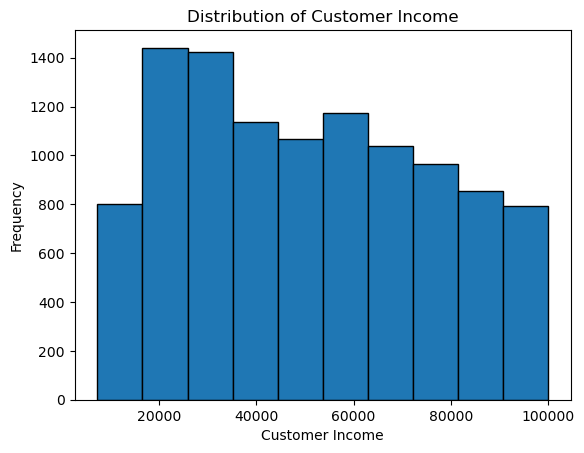

In [140]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(df_encoded['income'], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Customer Income')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Income')

# Display the plot
plt.show()


In [141]:
df_encoded

,customer_lifetime_value,coverage,education,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,...,10187,10221,10233,10367,10384,10394,10409,10519,10633,10671
0,4809.0,0.0,1.0,48029.0,61.0,7.0,52.0,0.0,9.0,292.0,...,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095
1,2228.0,0.0,1.0,92260.0,64.0,3.0,26.0,0.0,1.0,744.0,...,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095
2,14947.0,0.0,0.0,22139.0,100.0,34.0,31.0,0.0,2.0,480.0,...,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095
3,22332.0,1.0,1.0,49078.0,97.0,10.0,3.0,0.0,2.0,484.0,...,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095
4,9025.0,2.0,0.0,23675.0,117.0,33.0,31.0,0.0,7.0,707.0,...,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563.0,2.0,0.0,61541.0,253.0,12.0,40.0,0.0,7.0,1214.0,...,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095
10685,5259.0,0.0,1.0,61146.0,65.0,7.0,68.0,0.0,6.0,273.0,...,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095
10686,23893.0,1.0,0.0,39837.0,201.0,11.0,63.0,0.0,2.0,381.0,...,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095
10687,11971.0,2.0,1.0,64195.0,158.0,0.0,27.0,4.0,6.0,618.0,...,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095,7317.149095


In [143]:


# Specify the column names
column_names2 = [
    'customer_lifetime_value',
    'coverage',
    'education',
    'income',
    'monthly_premium_auto',
    'months_since_last_claim',
    'months_since_policy_inception',
    'number_of_open_complaints',
    'number_of_policies',
    'total_claim_amount',
    'vehicle_size',
    'region_central',
    'region_east',
    'region_north west',
    'region_west region',
    'policy_corporate l1',
    'policy_corporate l2',
    'policy_corporate l3',
    'policy_personal l1',
    'policy_personal l2',
    'policy_personal l3',
    'policy_special l1',
    'policy_special l2',
    'policy_special l3',
    'response_no',
    'response_yes',
    'month_feb',
    'month_jan',
    'employment_status_disabled',
    'employment_status_employed',
    'employment_status_medical leave',
    'employment_status_retired',
    'employment_status_unemployed',
    'location_code_rural',
    'location_code_suburban',
    'location_code_urban',
    'marital_status_divorced',
    'marital_status_married',
    'marital_status_single',
    'gender_f',
    'gender_m',
    'policy_type_corporate auto',
    'policy_type_personal auto',
    'policy_type_special auto',
    'renew_offer_type_offer1',
    'renew_offer_type_offer2',
    'renew_offer_type_offer3',
    'renew_offer_type_offer4',
    'sales_channel_agent',
    'sales_channel_branch',
    'sales_channel_call center',
    'sales_channel_web',
    'vehicle_class_four-door car',
    'vehicle_class_luxury car',
    'vehicle_class_luxury suv',
    'vehicle_class_sports car',
    'vehicle_class_suv',
    'vehicle_class_two-door car'
]

# Create a dictionary of columns to map
column_mapping = {column: df_encoded[column] for column in column_names2}

# Create the new DataFrame
df_no_outliers = pd.DataFrame(column_mapping)
